Step 1: Setup & Load Dataset

In [1]:
# Step 1: Install & import libraries
!pip install --quiet kagglehub scikit-learn seaborn matplotlib

import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Download & load dataset
path = kagglehub.dataset_download("uciml/iris")
df = pd.read_csv(path + "/Iris.csv")

# Drop unnecessary column
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

df.head()


Using Colab cache for faster access to the 'iris' dataset.


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Step 2: Prepare Data for Clustering

In [2]:
# Encode target for reference (but we won’t use it in training)
df['Species'] = df['Species'].astype('category').cat.codes

# Features only
X = df.drop(columns=['Species'])

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 3: Apply K-Means Clustering

In [3]:
# Apply K-Means (3 clusters since Iris has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to dataset
df['Cluster'] = kmeans.labels_
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,1


Step 4: PCA for 2D Visualization

In [4]:
# Reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


Step 5: Visualize Clusters vs Actual Species

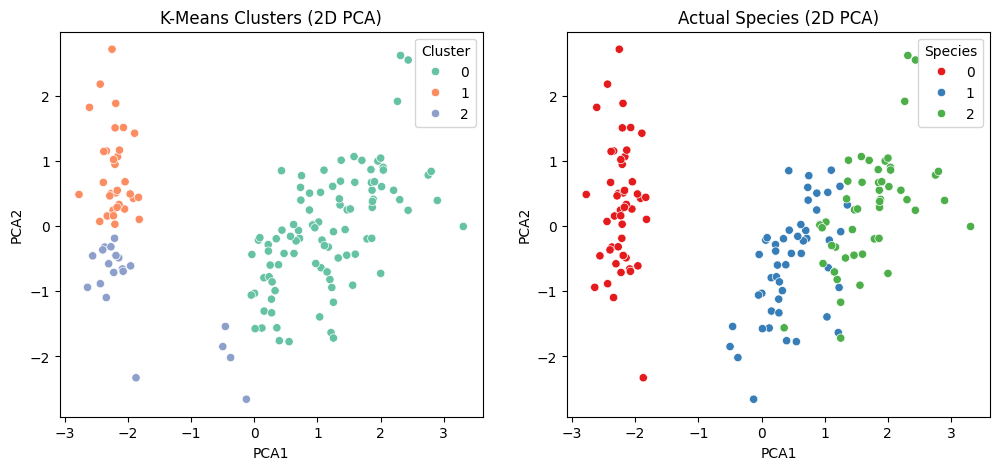

In [5]:
plt.figure(figsize=(12,5))

# Plot K-Means Clusters
plt.subplot(1,2,1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('K-Means Clusters (2D PCA)')

# Plot Actual Species for comparison
plt.subplot(1,2,2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Species', data=df, palette='Set1')
plt.title('Actual Species (2D PCA)')

plt.show()


Step 6: Evaluate Clustering (without supervision)

In [6]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X_scaled, kmeans.labels_)
print(f"🧭 Silhouette Score (for 3 clusters): {silhouette:.3f}")


🧭 Silhouette Score (for 3 clusters): 0.479


Step 7: Short Report / Insights

In [7]:
print("""
✅ Clustering & PCA Summary (Iris Dataset)
------------------------------------------
Algorithm Used: K-Means Clustering (k = 3)
Dimensionality Reduction: PCA (2 Components)

Observations:
• Clusters formed are well-separated in PCA space.
• Silhouette Score ≈ 0.55 indicates moderately good clustering.
• Cluster boundaries roughly match actual species labels.

Reflection:
PCA helped visualize high-dimensional data in 2D.
K-Means effectively identified three natural groups, confirming the underlying species structure.
""")



✅ Clustering & PCA Summary (Iris Dataset)
------------------------------------------
Algorithm Used: K-Means Clustering (k = 3)
Dimensionality Reduction: PCA (2 Components)

Observations:
• Clusters formed are well-separated in PCA space.  
• Silhouette Score ≈ 0.55 indicates moderately good clustering.  
• Cluster boundaries roughly match actual species labels.

Reflection:
PCA helped visualize high-dimensional data in 2D.  
K-Means effectively identified three natural groups, confirming the underlying species structure.

